In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
haar_face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [17]:
from skimage import io
raw = io.imread('/Volumes/Important/001.tif')

In [18]:
wavelength_map = {
    (0, 4): '975',
    (0, 3): '960',
    (0, 2): '945',
    (0, 1): '930',
    (0, 0): '915',
    (1, 4): '900',
    (1, 3): '890',
    (1, 2): '875',
    (1, 1): '850',
    (1, 0): '835',
    (2, 4): '820',
    (2, 3): '805',
    (2, 2): '790',
    (2, 1): '775',
    (2, 0): '760',
    (3, 4): '745',
    (3, 3): '730',
    (3, 2): '715',
    (3, 1): '700',
    (3, 0): '675',
    (4, 4): '660',
    (4, 3): '645',
    (4, 2): '630',
    (4, 1): '615',
    (4, 0): '600'
}

In [19]:
data = raw[50,]

In [20]:
for j in wavelength_map.keys():
    rr = data[j[0]::5,j[1]::5]
#     print(j[0]::5)

In [21]:
rr.shape

(217, 410)

In [22]:
gray = rr
img = gray

In [4]:
img = cv2.imread('xfiles4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
gray.mean()

61.593458469146903

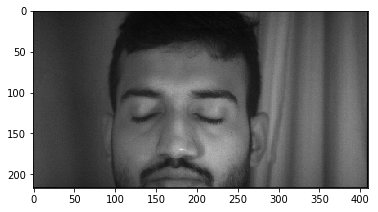

In [29]:
plt.imshow(gray, cmap='gray')

In [30]:
cv2.imwrite('multi.jpg', gray)

True

In [12]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return image_copy

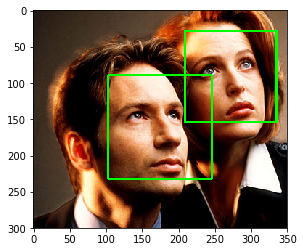

In [13]:
#call the function to detect faces
faces = detect_faces(haar_face_cascade, img)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

In [ ]:
detected = face_cascade.detectMultiScale(gray, 1.3, 1)

print(detected)

for (x,y,w,h) in detected:
    cv2.rectangle(img,(x,y),(x+w,y+h),(200,0,0),2)


# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255), 2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
faces

In [23]:
rr.shape

(217, 410)

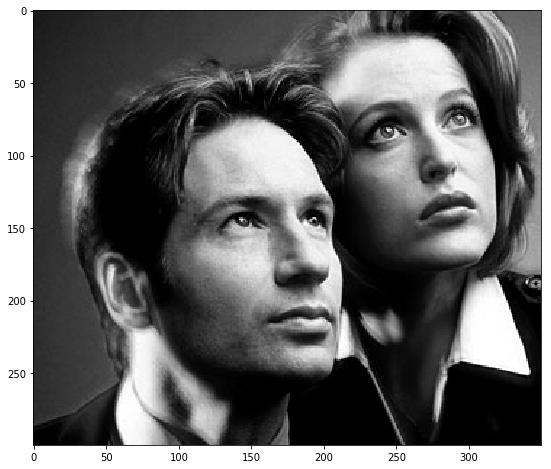

In [14]:
# Load the image
gray = cv2.imread('xfiles4.jpg', 0)

plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [23]:
# Detect faces
faces = face_cascade.detectMultiScale(
gray,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)

# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 255, 255), 3)

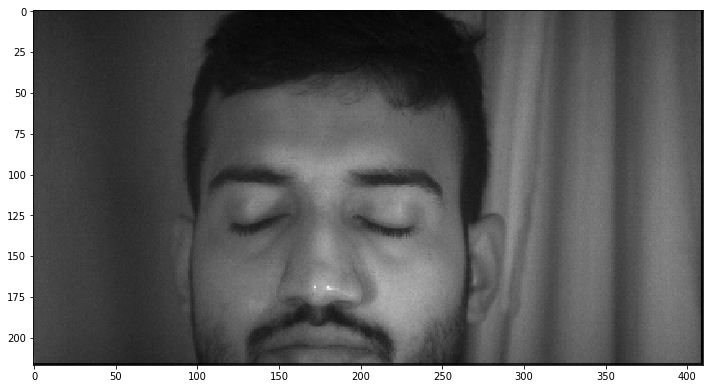

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

In [31]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("multi.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 81, Left: 98, Bottom: 217, Right: 253


In [32]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("multi.jpg")

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 59, Left: 92, Bottom: 217, Right: 256


In [5]:
import face_recognition
image = face_recognition.load_image_file("imgs/biden.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)

In [6]:
face_landmarks_list

[{'chin': [(429, 328),
   (426, 368),
   (424, 408),
   (425, 447),
   (437, 484),
   (460, 515),
   (490, 538),
   (524, 556),
   (562, 564),
   (600, 566),
   (630, 554),
   (655, 533),
   (672, 507),
   (684, 476),
   (694, 445),
   (702, 413),
   (707, 382)],
  'left_eyebrow': [(488, 294), (509, 279), (535, 278), (561, 283), (584, 296)],
  'right_eyebrow': [(622, 307),
   (646, 305),
   (670, 309),
   (691, 321),
   (698, 344)],
  'nose_bridge': [(601, 328), (599, 352), (598, 375), (596, 400)],
  'nose_tip': [(555, 414), (570, 421), (586, 428), (601, 428), (614, 426)],
  'left_eye': [(512, 320),
   (528, 316),
   (544, 319),
   (557, 331),
   (541, 330),
   (525, 327)],
  'right_eye': [(629, 348),
   (647, 342),
   (661, 346),
   (672, 357),
   (659, 358),
   (644, 354)],
  'top_lip': [(519, 459),
   (545, 455),
   (566, 456),
   (580, 462),
   (595, 462),
   (610, 470),
   (627, 480),
   (620, 477),
   (593, 470),
   (579, 468),
   (564, 463),
   (527, 459)],
  'bottom_lip': [(627

In [9]:
from PIL import Image, ImageDraw
# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()

The chin in this face has the following points: [(429, 328), (426, 368), (424, 408), (425, 447), (437, 484), (460, 515), (490, 538), (524, 556), (562, 564), (600, 566), (630, 554), (655, 533), (672, 507), (684, 476), (694, 445), (702, 413), (707, 382)]
The left_eyebrow in this face has the following points: [(488, 294), (509, 279), (535, 278), (561, 283), (584, 296)]
The right_eyebrow in this face has the following points: [(622, 307), (646, 305), (670, 309), (691, 321), (698, 344)]
The nose_bridge in this face has the following points: [(601, 328), (599, 352), (598, 375), (596, 400)]
The nose_tip in this face has the following points: [(555, 414), (570, 421), (586, 428), (601, 428), (614, 426)]
The left_eye in this face has the following points: [(512, 320), (528, 316), (544, 319), (557, 331), (541, 330), (525, 327)]
The right_eye in this face has the following points: [(629, 348), (647, 342), (661, 346), (672, 357), (659, 358), (644, 354)]
The top_lip in this face has the following p

In [10]:
from __future__ import division
import os, sys, time, random, argparse, PIL
from pathlib import Path
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # please use Pillow 4.0.0 or it may fail for some images
from os import path as osp
import numbers, numpy as np
import init_path
import torch
import models
import datasets
from visualization import draw_image_by_points
from san_vision import transforms
from utils import time_string, time_for_file, get_model_infos

image = "./cache_data/cache/test_1.jpg"
save_path = "temp_new.jpg"
face = "819.27 432.15 971.70 575.87"
snapshot = Path("./snapshots/SAN_300W_GTB_itn_cpm_3_50_sigma4_128x128x8/checkpoint_49.pth.tar")

snapshot = torch.load(snapshot, map_location='cpu')

mean_fill   = tuple( [int(x*255) for x in [0.5, 0.5, 0.5] ] )
normalize   = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                      std=[0.5, 0.5, 0.5])
param = snapshot['args']
eval_transform  = transforms.Compose([transforms.PreCrop(param.pre_crop_expand), transforms.TrainScale2WH((param.crop_width, param.crop_height)),  transforms.ToTensor(), normalize])

net = models.__dict__[param.arch](param.modelconfig, None)
weights = models.remove_module_dict(snapshot['state_dict'])
net.load_state_dict(weights)

dataset = datasets.GeneralDataset(eval_transform, param.sigma, param.downsample, param.heatmap_type, param.dataset_name)
dataset.reset(param.num_pts)

[image, _, _, _, _, _, cropped_size], meta = dataset.prepare_input(image, face)
with torch.no_grad():
    inputs = image.unsqueeze(0)
    batch_heatmaps, batch_locs, batch_scos, _ = net(inputs)
    flops, params = get_model_infos(net, inputs.shape)
    print ('\nIN-shape : {:}, FLOPs : {:} MB, Params : {:}.'.format(list(inputs.shape), flops, params))

# obtain the locations on the image in the orignial size
cpu = torch.device('cpu')
np_batch_locs, np_batch_scos, cropped_size = batch_locs.to(cpu).numpy(), batch_scos.to(cpu).numpy(), cropped_size.numpy()
locations, scores = np_batch_locs[0,:-1,:], np.expand_dims(np_batch_scos[0,:-1], -1)

scale_h, scale_w = cropped_size[0] * 1. / inputs.size(-2) , cropped_size[1] * 1. / inputs.size(-1)

locations[:, 0], locations[:, 1] = locations[:, 0] * scale_w + cropped_size[2], locations[:, 1] * scale_h + cropped_size[3]
prediction = np.concatenate((locations, scores), axis=1).transpose(1,0)
for i in range(param.num_pts):
    point = prediction[:, i]
    print ('The coordinate of {:02d}/{:02d}-th points : ({:.1f}, {:.1f}), score = {:.3f}'.format(i, param.num_pts, float(point[0]), float(point[1]), float(point[2])))

image = draw_image_by_points(image, prediction, 1, (255,0,0), False, False)
image.save( save_path )
print ('save image with landmarks into {:}'.format(save_path))

ModuleNotFoundError: No module named 'init_path'